# Result

In [7]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
datasets = ['adm', 'biggan', 'glide', 'midjourney', 'sdv5', 'vqdm', 'wukong', 'all']

In [9]:
classifier_results_df = pd.concat([pd.read_csv(f'./results/{dataset}/classifier_test.csv', names=['', f'{dataset}_train'], header=0, index_col=0).T for dataset in datasets])
classifier_results_df

,adm,biggan,glide,midjourney,sdv5,vqdm,wukong
adm_train,54.9,59.6,60.8,51.5,49.7,49.9,49.9
biggan_train,58.0,99.3,95.5,55.8,50.4,53.9,50.0
glide_train,65.2,98.2,99.3,68.5,55.6,58.7,52.7
midjourney_train,63.3,52.2,73.4,80.5,78.7,49.2,69.1
sdv5_train,58.1,54.6,78.6,87.8,89.8,56.7,84.3
vqdm_train,77.0,89.8,86.5,54.3,57.4,92.3,55.5
wukong_train,54.2,54.0,78.2,80.3,80.9,54.1,86.6
all_train,92.5,95.0,93.8,89.6,90.5,83.8,89.0


In [11]:
classifier_results_df.mean(axis=1)

adm_train           53.757143
biggan_train        66.128571
glide_train         71.171429
midjourney_train    66.628571
sdv5_train          72.842857
vqdm_train          73.257143
wukong_train        69.757143
all_train           90.600000
dtype: float64

In [10]:
teacher_results_df = pd.concat([pd.read_csv(f'./results/{dataset}/teacher_test.csv', names=['', f'{dataset}_train'], header=0, index_col=0).T for dataset in datasets])
teacher_results_df

,adm,biggan,glide,midjourney,sdv5,vqdm,wukong
adm_train,98.8,59.7,59.1,54.2,49.4,52.0,50.1
biggan_train,57.3,99.6,94.7,51.6,50.0,53.5,49.8
glide_train,62.6,97.8,99.1,67.1,53.8,56.9,51.4
midjourney_train,63.2,51.6,79.4,93.5,82.1,49.0,68.8
sdv5_train,57.3,52.4,76.6,87.1,92.5,53.2,85.1
vqdm_train,74.7,83.6,82.2,52.7,56.1,92.3,53.7
wukong_train,54.6,57.4,79.7,82.0,88.0,54.8,92.8
all_train,92.5,95.3,95.1,91.4,91.7,85.2,89.3


In [12]:
teacher_results_df.mean(axis=1)

adm_train           60.471429
biggan_train        65.214286
glide_train         69.814286
midjourney_train    69.657143
sdv5_train          72.028571
vqdm_train          70.757143
wukong_train        72.757143
all_train           91.500000
dtype: float64

In [44]:
resnet_results_df = pd.concat([pd.read_csv(f'./results/{dataset}/resnet50_test.csv', names=['', f'{dataset}_train'], header=0, index_col=0).T for dataset in datasets])
resnet_results_df

,adm,biggan,glide,midjourney,sdv5,vqdm,wukong
adm_train,61.6,48.7,49.6,50.9,51.3,49.3,51.2
biggan_train,50.0,48.9,52.5,50.4,48.6,51.7,51.0
glide_train,51.6,50.1,50.4,50.2,49.7,50.5,49.0
midjourney_train,50.3,51.5,52.7,51.2,51.9,50.1,51.3
sdv5_train,47.6,50.7,50.0,52.5,47.2,50.0,48.7
vqdm_train,51.5,49.4,51.7,49.8,50.6,51.8,51.2
wukong_train,47.1,50.7,47.8,51.2,49.6,47.8,49.7


In [45]:
resnet_results_df.mean(axis=1)

adm_train           51.800000
biggan_train        50.442857
glide_train         50.214286
midjourney_train    51.285714
sdv5_train          49.528571
vqdm_train          50.857143
wukong_train        49.128571
dtype: float64

In [46]:
ssp_results_df = pd.concat([pd.read_csv(f'./results/{dataset}/ssp_test.csv', names=['', f'{dataset}_train'], header=0, index_col=0).T for dataset in datasets])
ssp_results_df

,adm,biggan,glide,midjourney,sdv5,vqdm,wukong
adm_train,72.8,52.0,50.6,49.7,50.4,50.4,50.6
biggan_train,50.8,56.4,56.5,54.6,54.2,50.7,54.6
glide_train,52.3,55.1,62.1,54.6,53.9,49.8,55.6
midjourney_train,50.8,51.3,53.8,53.4,51.5,50.3,52.2
sdv5_train,51.0,50.9,50.7,51.1,51.5,51.0,50.0
vqdm_train,49.6,51.0,52.5,49.6,49.2,53.2,50.7
wukong_train,51.2,50.5,50.0,49.7,52.6,51.2,52.7


In [47]:
ssp_results_df.mean(axis=1)

adm_train           53.785714
biggan_train        53.971429
glide_train         54.771429
midjourney_train    51.900000
sdv5_train          50.885714
vqdm_train          50.828571
wukong_train        51.128571
dtype: float64

# Imgs

In [ ]:
_datasets = ['adm', 'biggan_full', 'glide', 'midjourney', 'sdv5', 'vqdm', 'wukong']
ai_img_sizes = []
nature_img_sizes = []

for _ in _datasets:
	train_path_ai = f"./data/{_}/train/ai"
	test_path_ai = f"./data/{_}/val/ai"
	
	train_path_nature = f"./data/{_}/train/nature"
	test_path_nature = f"./data/{_}/val/nature"

	for img in os.listdir(train_path_ai):
		try:
			image = Image.open(f"{train_path_ai}/{img}")
			w, h = image.size
			ai_img_sizes.append({"size": f"{w}x{h}", "w": w, "h": h})
		except Exception as e:
				print(e)
				err_img = str(e).split("'")[1]
				print(err_img)
				os.remove(err_img)

	for img in os.listdir(test_path_ai):
		try:
			image = Image.open(f"{test_path_ai}/{img}")
			w, h = image.size
			ai_img_sizes.append({"size": f"{w}x{h}", "w": w, "h": h})
		except Exception as e:
				print(e)
				err_img = str(e).split("'")[1]
				print(err_img)
				os.remove(err_img)

	for img in os.listdir(train_path_nature):
		try:
			image = Image.open(f"{train_path_nature}/{img}")
			w, h = image.size
			nature_img_sizes.append({"size": f"{w}x{h}", "w": w, "h": h})
		except Exception as e:
				print(e)
				err_img = str(e).split("'")[1]
				print(err_img)
				os.remove(err_img)
	
	for img in os.listdir(test_path_nature):
		try:
			image = Image.open(f"{test_path_nature}/{img}")
			w, h = image.size
			nature_img_sizes.append({"size": f"{w}x{h}", "w": w, "h": h})
		except Exception as e:
				print(e)
				err_img = str(e).split("'")[1]
				print(err_img)
				os.remove(err_img)

In [ ]:
df_ai_img_sizes = pd.DataFrame(ai_img_sizes)
df_nature_img_sizes = pd.DataFrame(nature_img_sizes)

In [ ]:
grouped_ai = df_ai_img_sizes.groupby(["size", "w", "h"]).size().reset_index(name="count")
grouped_nature = df_nature_img_sizes.groupby(["size", "w", "h"]).size().reset_index(name="count")

In [ ]:
grouped_ai.to_csv("ai_img_sizes2.csv", index=False)
grouped_nature.to_csv("nature_img_sizes2.csv", index=False)

In [ ]:
grouped_ai = pd.read_csv("ai_img_sizes2.csv").sort_values(by="w")

plt.figure(figsize=(20, 10))
plt.bar(grouped_ai["size"], grouped_ai["count"])
plt.title("AI Image Sizes")

In [ ]:
grouped_nature = pd.read_csv("nature_img_sizes2.csv")

plt.figure(figsize=(20, 10))
plt.scatter(grouped_nature["w"], grouped_nature["h"])
plt.xlabel("Width")
plt.ylabel("Height")
plt.xticks(range(0, grouped_nature["w"].max()+1, 256))
plt.yticks(range(0, grouped_nature["h"].max()+1, 256))
plt.title("Nature Image Sizes")

# Train Res

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = "adm"

Text(0.5, 0.98, 'adm Teacher')

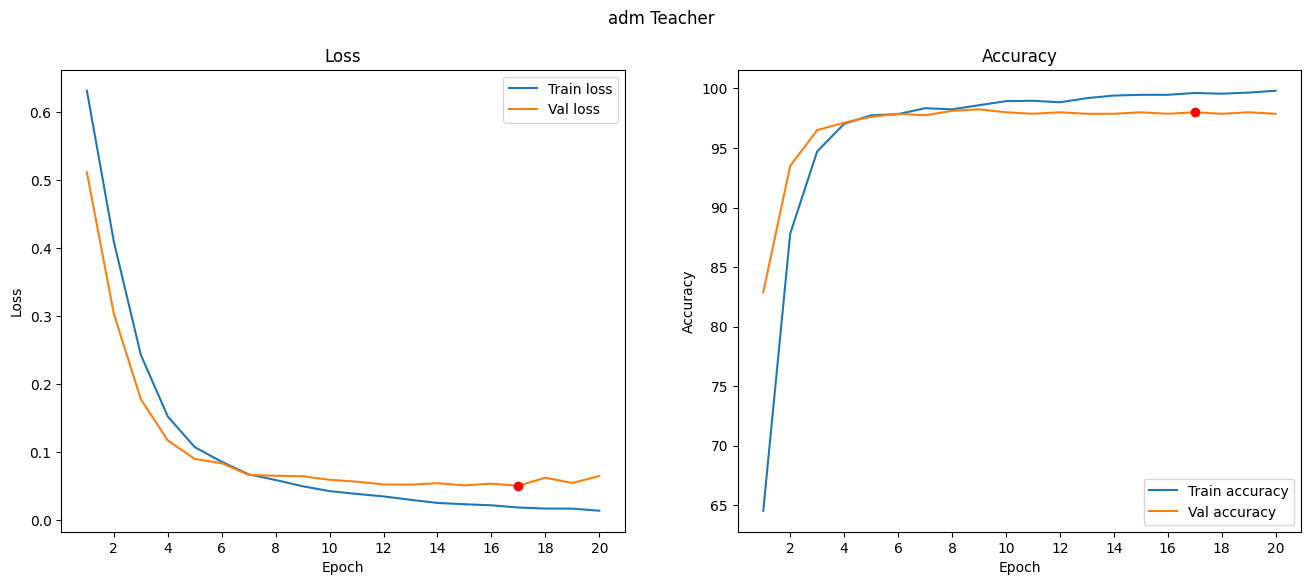

In [2]:
result = pd.read_csv(f'./results/{dataset}/teacher.csv')

min_val_loss = float('inf')
for _, row in result.iterrows():
    if row['val_loss'] < min_val_loss:
        min_val_loss = row['val_loss']
        min_val_loss_row = row
        
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(result['epoch'], result['train_loss'], label='Train loss')
ax[0].plot(result['epoch'], result['val_loss'], label='Val loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xticks(result['epoch'][1::2])
ax[0].plot(min_val_loss_row['epoch'], min_val_loss_row['val_loss'], 'ro')
ax[0].legend()

ax[1].plot(result['epoch'], result['train_acc'], label='Train accuracy')
ax[1].plot(result['epoch'], result['val_acc'], label='Val accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticks(result['epoch'][1::2])
ax[1].plot(min_val_loss_row['epoch'], min_val_loss_row['val_acc'], 'ro')
ax[1].legend()

fig.suptitle(f'{dataset} Teacher')

Text(0.5, 0.98, 'adm Student')

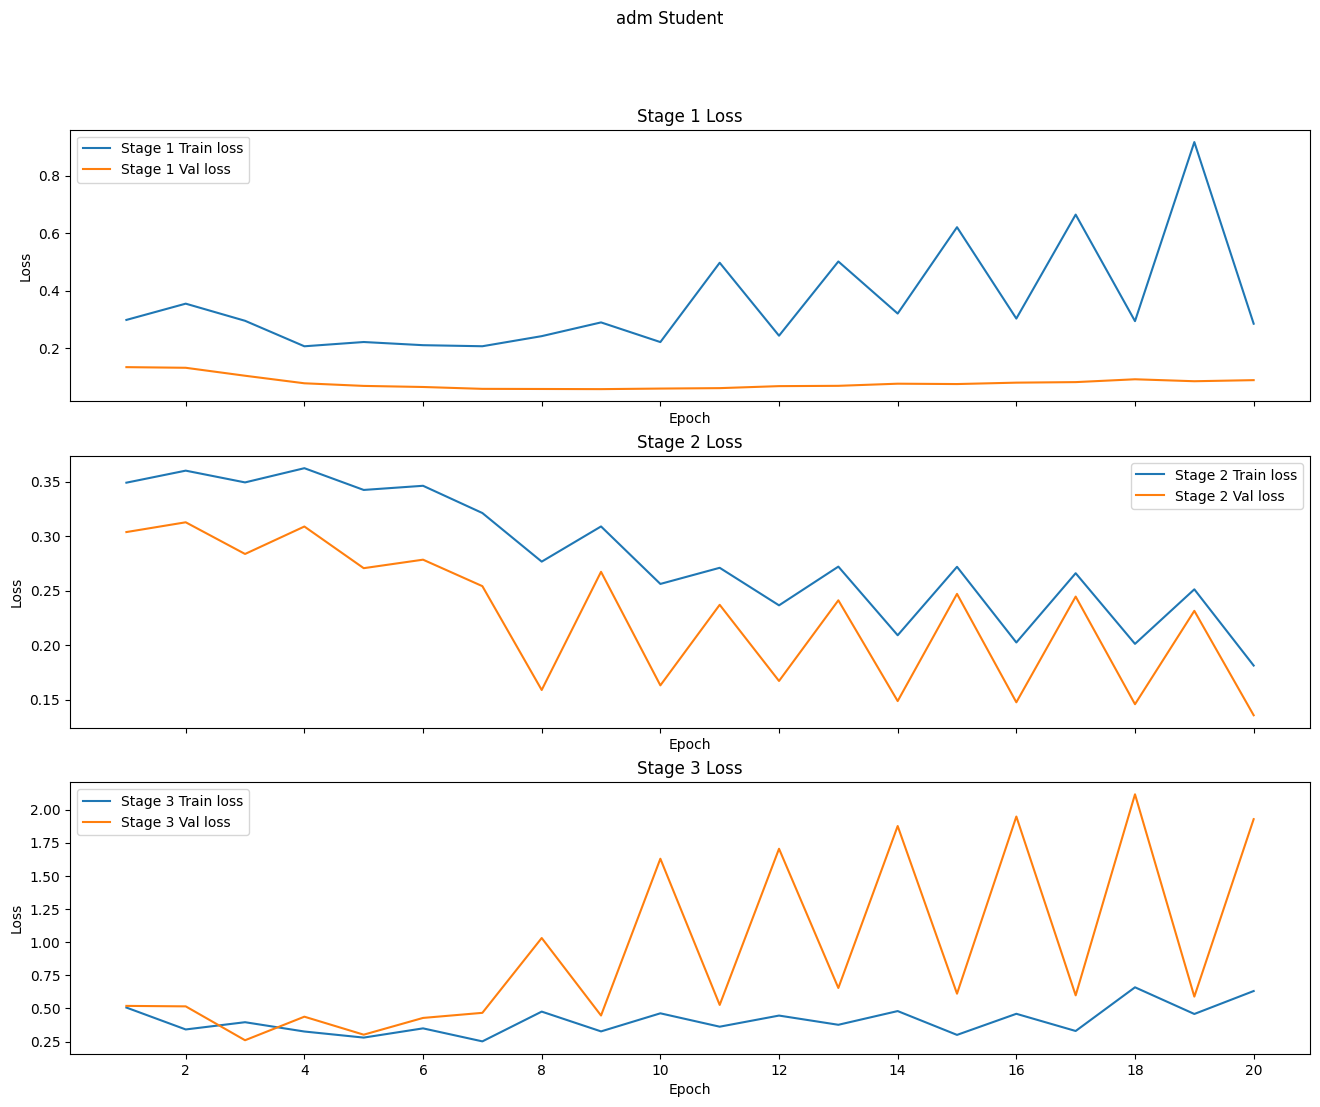

In [3]:
result = pd.read_csv(f'./results/{dataset}/student.csv')

fig, ax = plt.subplots(3, 1, figsize=(16, 12), sharex='col')

ax[0].plot(result['epoch'], result['stage1_train_loss'], label='Stage 1 Train loss')
ax[0].plot(result['epoch'], result['stage1_val_loss'], label='Stage 1 Val loss')
ax[0].set_title('Stage 1 Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xticks(result['epoch'][1::2])
ax[0].legend()

ax[1].plot(result['epoch'], result['stage2_train_loss'], label='Stage 2 Train loss')
ax[1].plot(result['epoch'], result['stage2_val_loss'], label='Stage 2 Val loss')
ax[1].set_title('Stage 2 Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_xticks(result['epoch'][1::2])
ax[1].legend()

ax[2].plot(result['epoch'], result['stage3_train_loss'], label='Stage 3 Train loss')
ax[2].plot(result['epoch'], result['stage3_val_loss'], label='Stage 3 Val loss')
ax[2].set_title('Stage 3 Loss')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].set_xticks(result['epoch'][1::2])
ax[2].legend()

plt.suptitle(f'{dataset} Student')

Text(0.5, 0.98, 'adm Classifier')

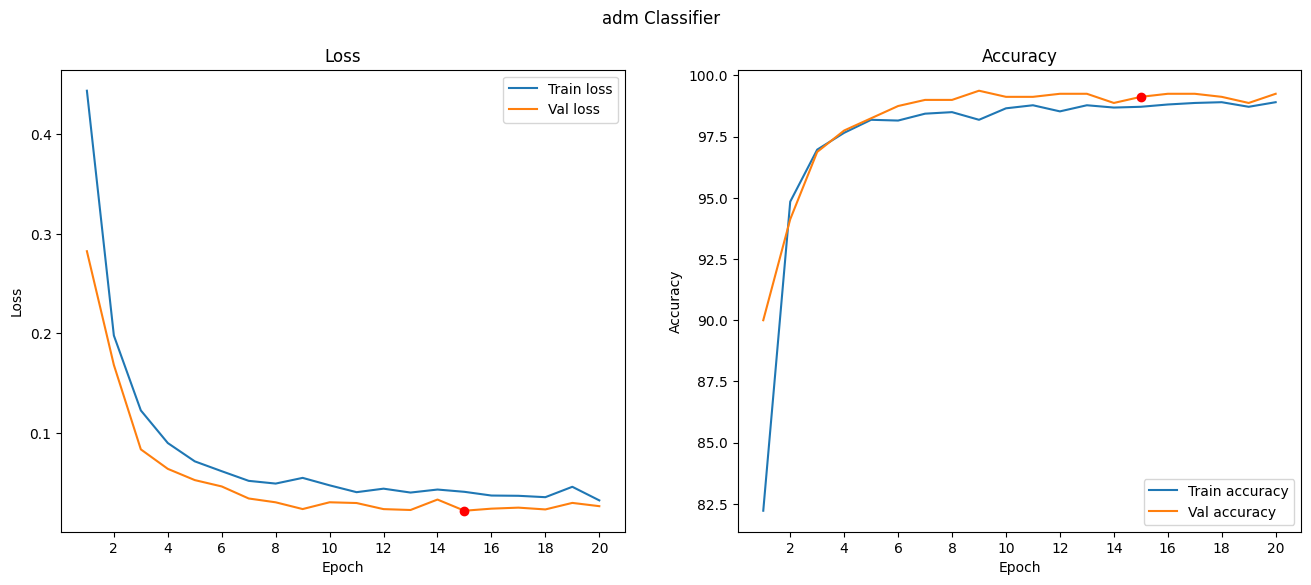

In [4]:
result = pd.read_csv(f'./results/{dataset}/classifier.csv')

min_val_loss = float('inf')
for _, row in result.iterrows():
    if row['val_loss'] < min_val_loss:
        min_val_loss = row['val_loss']
        min_val_loss_row = row
        
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(result['epoch'], result['train_loss'], label='Train loss')
ax[0].plot(result['epoch'], result['val_loss'], label='Val loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xticks(result['epoch'][1::2])
ax[0].plot(min_val_loss_row['epoch'], min_val_loss_row['val_loss'], 'ro')
ax[0].legend()

ax[1].plot(result['epoch'], result['train_acc'], label='Train accuracy')
ax[1].plot(result['epoch'], result['val_acc'], label='Val accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticks(result['epoch'][1::2])
ax[1].plot(min_val_loss_row['epoch'], min_val_loss_row['val_acc'], 'ro')
ax[1].legend()

plt.suptitle(f'{dataset} Classifier')

Text(0.5, 0.98, 'adm ResNet50')

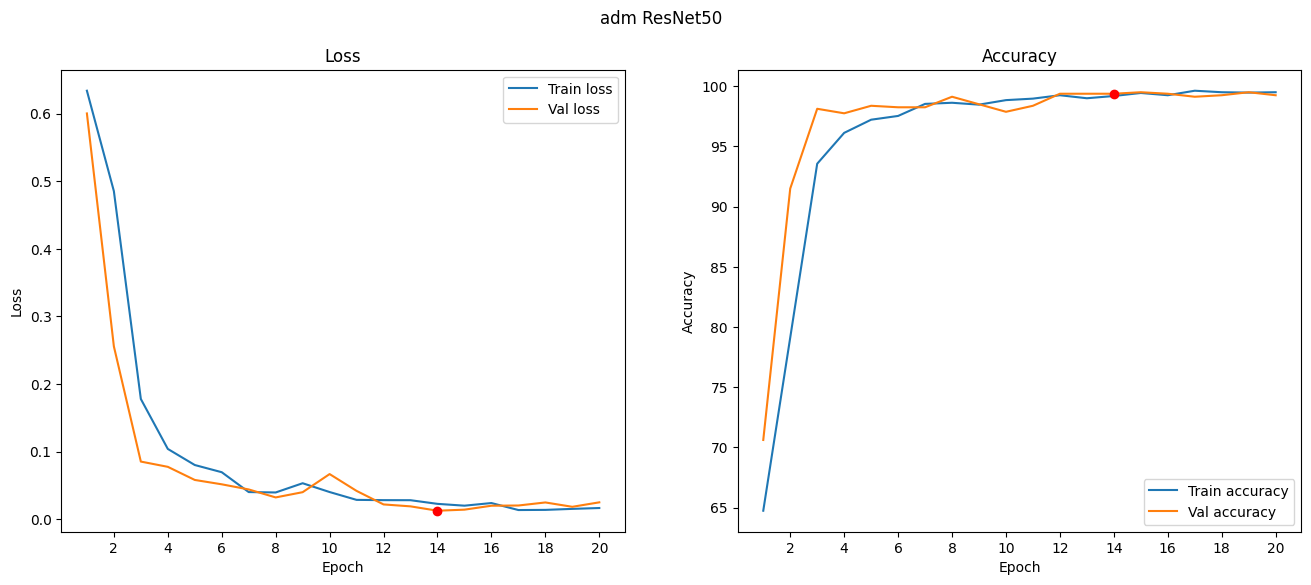

In [5]:
result = pd.read_csv(f'./results/{dataset}/resnet50.csv')

min_val_loss = float('inf')
for _, row in result.iterrows():
    if row['val_loss'] < min_val_loss:
        min_val_loss = row['val_loss']
        min_val_loss_row = row
        
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(result['epoch'], result['train_loss'], label='Train loss')
ax[0].plot(result['epoch'], result['val_loss'], label='Val loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xticks(result['epoch'][1::2])
ax[0].plot(min_val_loss_row['epoch'], min_val_loss_row['val_loss'], 'ro')
ax[0].legend()

ax[1].plot(result['epoch'], result['train_acc'], label='Train accuracy')
ax[1].plot(result['epoch'], result['val_acc'], label='Val accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticks(result['epoch'][1::2])
ax[1].plot(min_val_loss_row['epoch'], min_val_loss_row['val_acc'], 'ro')
ax[1].legend()

plt.suptitle(f'{dataset} ResNet50')

Text(0.5, 0.98, 'adm SSP')

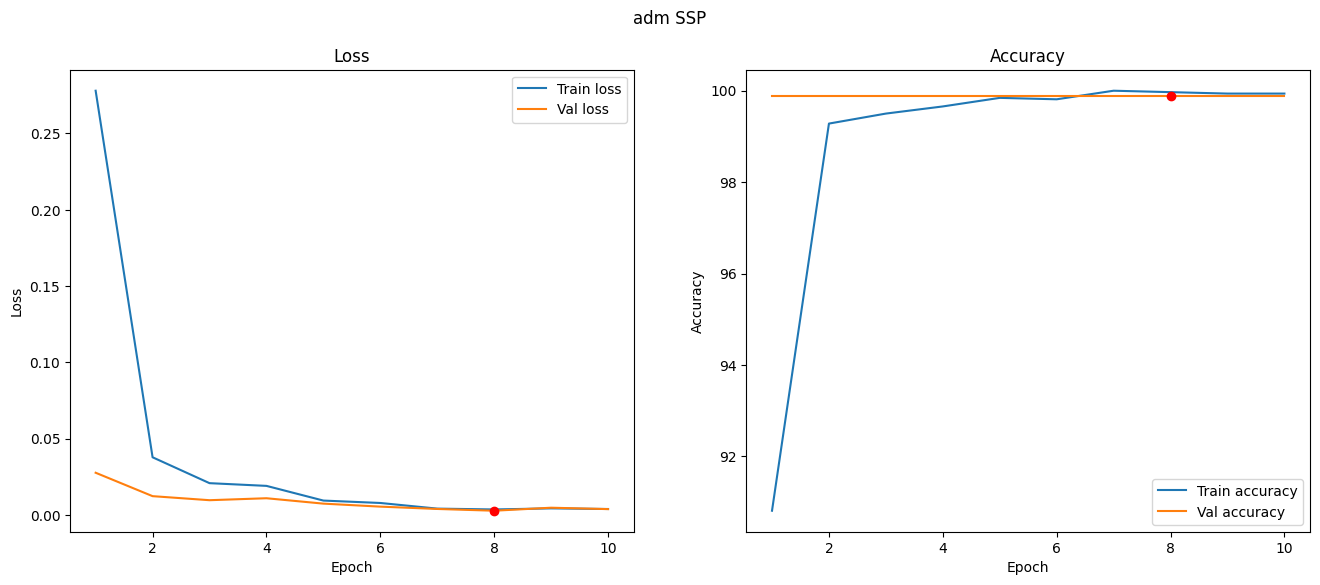

In [6]:
result = pd.read_csv(f'./results/{dataset}/ssp.csv')

min_val_loss = float('inf')
for _, row in result.iterrows():
    if row['val_loss'] < min_val_loss:
        min_val_loss = row['val_loss']
        min_val_loss_row = row
        
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(result['epoch'], result['train_loss'], label='Train loss')
ax[0].plot(result['epoch'], result['val_loss'], label='Val loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xticks(result['epoch'][1::2])
ax[0].plot(min_val_loss_row['epoch'], min_val_loss_row['val_loss'], 'ro')
ax[0].legend()

ax[1].plot(result['epoch'], result['train_acc'], label='Train accuracy')
ax[1].plot(result['epoch'], result['val_acc'], label='Val accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticks(result['epoch'][1::2])
ax[1].plot(min_val_loss_row['epoch'], min_val_loss_row['val_acc'], 'ro')
ax[1].legend()

plt.suptitle(f'{dataset} SSP')